In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('ecommerce-session-bigquery.csv')
data.head()

fullVisitorId channelGrouping     time        country  \
0  2515546493837534633  Organic Search   966564         Taiwan   
1  9361741997835388618  Organic Search   157377         France   
2  7313828956068851679        Referral   228279  United States   
3  6036794406403793540  Organic Search  1615618  United States   
4  7847280609739507227  Organic Search    37832         Canada   

                            city  totalTransactionRevenue  transactions  \
0                      (not set)                      NaN           NaN   
1  not available in demo dataset                      NaN           NaN   
2                  San Francisco                      NaN           NaN   
3                        Boulder                      NaN           NaN   
4  not available in demo dataset                      NaN           NaN   

   timeOnSite  pageviews  sessionQualityDim  ...  itemQuantity  itemRevenue  \
0      1567.0       82.0               17.0  ...           NaN          NaN   
1       321.0        8.0                NaN  ...           NaN          NaN   
2       927.0       11.0               63.0  ...           NaN          NaN   
3      1616.0       13.0               38.0  ...           NaN          NaN   
4      1222.0       45.0               53.0  ...           NaN          NaN   

  transactionRevenue  transactionId  pageTitle  searchKeyword  \
0                NaN            NaN        NaN            NaN   
1                NaN            NaN        NaN            NaN   
2                NaN            NaN        NaN            NaN   
3                NaN            NaN        NaN            NaN   
4                NaN            NaN        NaN            NaN   

    pagePathLevel1 eCommerceAction_type eCommerceAction_step  \
0  /storeitem.html                    0                    1   
1  /storeitem.html                    0                    1   
2  /storeitem.html                    0                    1   
3  /storeitem.html                    0                    1   
4  /storeitem.html                    0                    1   

  eCommerceAction_option  
0                    NaN  
1                    NaN  
2                    NaN  
3                    NaN  
4                    NaN  

[5 rows x 32 columns]

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   fullVisitorId            10000 non-null  uint64 
 1   channelGrouping          10000 non-null  object 
 2   time                     10000 non-null  int64  
 3   country                  10000 non-null  object 
 4   city                     10000 non-null  object 
 5   totalTransactionRevenue  619 non-null    float64
 6   transactions             628 non-null    float64
 7   timeOnSite               9713 non-null   float64
 8   pageviews                9999 non-null   float64
 9   sessionQualityDim        19 non-null     float64
 10  date                     10000 non-null  int64  
 11  visitId                  10000 non-null  int64  
 12  type                     10000 non-null  object 
 13  productRefundAmount      0 non-null      float64
 14  productQuantity        

### Case 1: Identify top products based on the total transaction revenue per day.

For the Case 1, here is i attached my prompt using chatgpt on link: https://chat.openai.com/share/d1ba98c0-d74e-4457-9a51-ea00587cf317

I provide sample data (10 rows) from the dataset to ChatGPT and command to ChatGPT to identify Case 1, you can find out the result from ChatGPT on the next cell

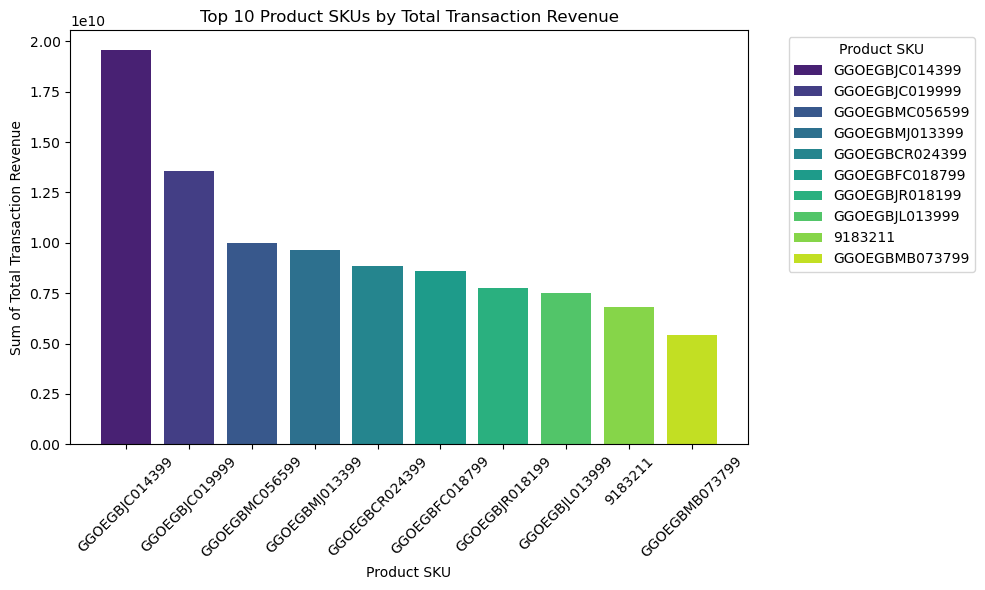

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is a DataFrame containing the provided data
# Convert 'totalTransactionRevenue' column to numeric
data['totalTransactionRevenue'] = pd.to_numeric(data['totalTransactionRevenue'], errors='coerce')

# Group data by product SKU and calculate the sum of total transaction revenue
sku_revenue = data.groupby('productSKU')['totalTransactionRevenue'].sum().reset_index()

# Sort SKUs by total revenue and select the top 10
top_10_skus = sku_revenue.nlargest(10, 'totalTransactionRevenue')

# Create color gradient palette for the top 10 SKUs
colors = sns.color_palette("viridis", len(top_10_skus))

# Visualize top 10 SKUs by total transaction revenue using a vertical bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(top_10_skus['productSKU'], top_10_skus['totalTransactionRevenue'], color=colors)

# Add labels and title
plt.xlabel('Product SKU')
plt.ylabel('Sum of Total Transaction Revenue')
plt.title('Top 10 Product SKUs by Total Transaction Revenue')

# Add color legend for SKUs
plt.legend(bars, top_10_skus['productSKU'], bbox_to_anchor=(1.05, 1), loc='upper left', title='Product SKU')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### Analysis for Case 1

The result prompted by ChatGPT is perfectly match with what I want, the code grouping the productSKU and sum the totalTransactionRevenue, filtered it to top 10 SKU.

For the improvement, I will recheck totalTransactionRevenue for Top10 product and revise visualization such as remove the legend, add data label and rescale the Y axis value.

In [9]:
top_10_skus

productSKU  totalTransactionRevenue
53  GGOEGBJC014399             1.956474e+10
54  GGOEGBJC019999             1.354043e+10
58  GGOEGBMC056599             9.991900e+09
59  GGOEGBMJ013399             9.624530e+09
50  GGOEGBCR024399             8.855730e+09
51  GGOEGBFC018799             8.597520e+09
56  GGOEGBJR018199             7.733030e+09
55  GGOEGBJL013999             7.532610e+09
29         9183211             6.831960e+09
57  GGOEGBMB073799             5.412270e+09

In [10]:
from matplotlib.ticker import FuncFormatter

def format_y_ticks(value, _):
    if value >= 1e9:  # Billion
        return f'{value / 1e9:.1f} B'
    elif value >= 1e6:  # Million
        return f'{value / 1e6:.1f} M'
    elif value >= 1e3:  # Thousand
        return f'{value / 1e3:.1f} K'
    else:
        return f'{value:.0f}'

def add_formatted_labels(data):
    for i, value in enumerate(data['totalTransactionRevenue']):
        label = format_y_ticks(value, None)
        plt.text(i, value, label, ha='center', va='bottom')

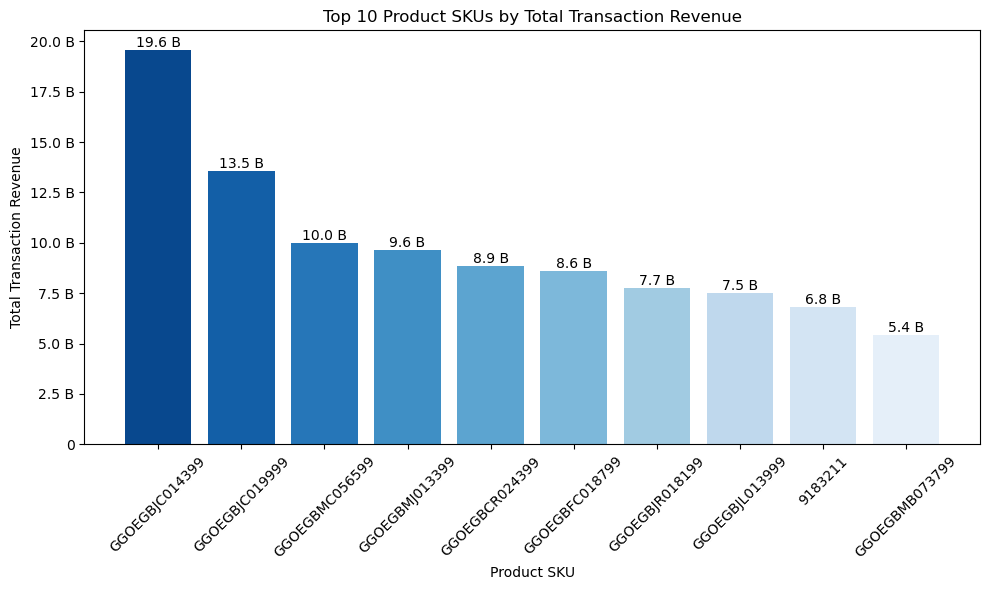

In [11]:
plt.figure(figsize=(10, 6))
colors = sns.color_palette("Blues_r", len(top_10_skus))
bars = plt.bar(top_10_skus['productSKU'], top_10_skus['totalTransactionRevenue'], color=colors)

plt.gca().yaxis.set_major_formatter(FuncFormatter(format_y_ticks))
add_formatted_labels(top_10_skus)
plt.xlabel('Product SKU')
plt.ylabel('Total Transaction Revenue')
plt.title('Top 10 Product SKUs by Total Transaction Revenue')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Case 2: Detect any anomalies, such as a sharp decrease or increase in the number of transactions for a specific product.

For the Case 2, here is i attached my prompt using chatgpt on link: https://chat.openai.com/share/7173bf0b-3999-4c3f-aa84-7db1751938f5

I provide sample data (10 rows) from the dataset to ChatGPT and command to ChatGPT to Detect anomalies, you can find out the result from ChatGPT on the next cell

In [42]:
import pandas as pd

# Assuming the data is in a CSV format, read it into a DataFrame
data = pd.read_csv('ecommerce-session-bigquery.csv')  # Replace 'your_data.csv' with your file path

# Check for duplicate rows
duplicate_rows = data[data.duplicated()]
print("Duplicate Rows:")
print(duplicate_rows)

Duplicate Rows:
Empty DataFrame
Columns: [fullVisitorId, channelGrouping, time, country, city, totalTransactionRevenue, transactions, timeOnSite, pageviews, sessionQualityDim, date, visitId, type, productRefundAmount, productQuantity, productPrice, productRevenue, productSKU, v2ProductName, v2ProductCategory, productVariant, currencyCode, itemQuantity, itemRevenue, transactionRevenue, transactionId, pageTitle, searchKeyword, pagePathLevel1, eCommerceAction_type, eCommerceAction_step, eCommerceAction_option]
Index: []

[0 rows x 32 columns]


In [43]:
# Count distinct v2ProductName grouped by productSKU
distinct_products = data.groupby('productSKU')['v2ProductName'].nunique()

# Filter productSKUs with more than 1 v2ProductName
anomalies_product_names = distinct_products[distinct_products > 1]
print("ProductSKUs with more than one v2ProductName:")
print(anomalies_product_names)

ProductSKUs with more than one v2ProductName:
productSKU
GGOEGAAX0098      2
GGOEGAAX0231      2
GGOEGBJC014399    2
GGOEGBJC019999    2
GGOEGBJR018199    2
GGOEGBMC056599    2
GGOEGCBQ016499    2
GGOEGFSR022099    2
GGOEGFYQ016599    2
GGOEGKAA019299    2
GGOEGPJC203399    2
Name: v2ProductName, dtype: int64


In [44]:
# Group by productSKU
grouped_data = data.groupby('productSKU')

# Aggregate transaction and revenue data
agg_data = grouped_data.agg(
    min_totalRevenue=('totalTransactionRevenue', 'min'),
    max_totalRevenue=('totalTransactionRevenue', 'max'),
    gap_totalRevenue=('totalTransactionRevenue', lambda x: x.max() - x.min()),
    min_transactions=('transactions', 'min'),
    max_transactions=('transactions', 'max'),
    gap_transactions=('transactions', lambda x: x.max() - x.min())
)

print("Summary of Transaction and Revenue Data:")
print(agg_data)

Summary of Transaction and Revenue Data:
                min_totalRevenue  max_totalRevenue  gap_totalRevenue  \
productSKU                                                             
9180781                      NaN               NaN               NaN   
9180793                      NaN               NaN               NaN   
9180838               24710000.0        67570000.0        42860000.0   
9180842                      NaN               NaN               NaN   
9180844                      NaN               NaN               NaN   
...                          ...               ...               ...   
GGOEGKAA019299        30970000.0        98590000.0        67620000.0   
GGOEGOCD078399       154980000.0       273000000.0       118020000.0   
GGOEGPJC203399        19980000.0       181610000.0       161630000.0   
GGOEYFKQ020699               NaN               NaN               NaN   
GGOEYOBR078599       375590000.0       375590000.0               0.0   

                min_tr

#### Analysis for Case 2

For Case 2, i create 3 scenario to detect anomalies such as:
1. check duplicate rows for all columns
2. count distinct v2ProductName, group by productSKU and filter the productSKU that have more than 1 v2ProductName
3. group by productSKU, add columns min and max totalTransactionRevenue, gap of min and max totalTransactionRevenue, min and max transaction and gap of min and max transaction

i have no concern with 1st scenario result, but for the 2nd and 3rd i need to improve more details about it. For the improvement, On 2nd scenario, i will breakdown v2ProductName column to get the different value of it, On 3rd scenario i will display it in dataframe and remove the unnecessary productSKU that unlikely anomalies

In [59]:
product_count = data.groupby('productSKU')['v2ProductName'].nunique()
filtered_skus = product_count[product_count > 1].index
filtered_data = data[data['productSKU'].isin(filtered_skus)]
filtered_column = filtered_data.drop_duplicates(subset=['productSKU', 'v2ProductName'])

result_list = []

for sku in filtered_skus:
    sku_products = filtered_column[filtered_column['productSKU'] == sku]['v2ProductName'].tolist()
    if len(sku_products) >= 2:
        result_list.append({
            'productSKU': sku,
            'v2ProductName 1': sku_products[0],
            'v2ProductName 2': sku_products[1]
        })

result_df = pd.DataFrame(result_list, columns=['productSKU', 'v2ProductName 1', 'v2ProductName 2'])
result_df

productSKU                 v2ProductName 1             v2ProductName 2
0     GGOEGAAX0098             7&quot; Dog Frisbee              7" Dog Frisbee
1     GGOEGAAX0231     Google Collapsible Pet Bowl        Collapsible Pet Bowl
2   GGOEGBJC014399                 Google Tote Bag    Speed Zone Air Mesh Tote
3   GGOEGBJC019999        Collapsible Shopping Bag  Latitudes Foldaway Shopper
4   GGOEGBJR018199           Reusable Shopping Bag             Chevron Shopper
5   GGOEGBMC056599             Waterproof Gear Bag          Waterpoof Gear Bag
6   GGOEGCBQ016499  SPF-15 Slim & Slender Lip Balm             SPF-15 Lip Balm
7   GGOEGFSR022099                Google Kick Ball                   Kick Ball
8   GGOEGFYQ016599      Foam Can and Bottle Cooler           Koozie Can Kooler
9   GGOEGKAA019299    Switch Tone Color Crayon Pen          Pop-a-Point Crayon
10  GGOEGPJC203399            Crunch Noise Dog Toy           Crunch-It Dog Toy

In [55]:
print(filtered_column)

          productSKU                v2ProductName
313     GGOEGAAX0231  Google Collapsible Pet Bowl
314     GGOEGAAX0231  Google Collapsible Pet Bowl
315     GGOEGAAX0231  Google Collapsible Pet Bowl
316     GGOEGAAX0231  Google Collapsible Pet Bowl
318     GGOEGAAX0231         Collapsible Pet Bowl
...              ...                          ...
9473  GGOEGBMC056599          Waterproof Gear Bag
9474  GGOEGBMC056599           Waterpoof Gear Bag
9475  GGOEGBMC056599           Waterpoof Gear Bag
9476  GGOEGBMC056599           Waterpoof Gear Bag
9477  GGOEGBMC056599          Waterproof Gear Bag

[4193 rows x 2 columns]


In [72]:
# i tranform the variable to DataFrame for better readability
agg_df = pd.DataFrame(agg_data)

# remove row with NaN values
agg_df = agg_df.dropna()

# filter the data that gap of total revenue not zero but the gap of the transaction is zero, because why theres gap revenue
# when the number of transaction is the same
filtered_agg_df = agg_df[(agg_df['gap_totalRevenue'] != 0) & (agg_df['gap_transactions'] == 0)]

# then sorted the data by gap totalrenuve descending
sorted_filtered_agg_df = filtered_agg_df.sort_values(by='gap_totalRevenue', ascending=False)

def reformat_revenue(value):
    if value >= 1e9:  # Billion
        return f'{value / 1e9:.2f}B'
    elif value >= 1e6:  # Million
        return f'{value / 1e6:.2f}M'
    elif value >= 1e3:  # Thousand
        return f'{value / 1e3:.2f}K'
    else:
        return f'{value:.2f}'

# Apply the formatting function to 'gap_totalRevenue' column
sorted_filtered_agg_df['gap_totalRevenue'] = sorted_filtered_agg_df['gap_totalRevenue'].apply(reformat_revenue)

sorted_filtered_agg_df

min_totalRevenue  max_totalRevenue gap_totalRevenue  \
productSKU                                                            
GGOEGAAX0168          18590000.0      2.447870e+09            2.43B   
GGOEGCMB020932         7980000.0      1.894180e+09            1.89B   
GGOEGCKQ013199        16450000.0      1.894180e+09            1.88B   
GGOEGAAX0037          15590000.0      1.002590e+09          987.00M   
GGOEAKDH019899        16450000.0      1.002590e+09          986.14M   
GGOEGCBQ016499        20970000.0      6.540000e+08          633.03M   
GGOEGCGB022199         9490000.0      5.437000e+08          534.21M   
GGOEGBJB022599        11480000.0      5.020300e+08          490.55M   
GGOEGAYR023499        10480000.0      3.502300e+08          339.75M   
GGOEGCLB020832        24990000.0      3.138900e+08          288.90M   
GGOEGFSR022099        16960000.0      2.657500e+08          248.79M   
GGOEGAAX0231          12500000.0      2.390600e+08          226.56M   
GGOEGCNB021099        15590000.0      1.816100e+08          166.02M   
GGOEGOCD078399       154980000.0      2.730000e+08          118.02M   
GGOEGAAX0098          31460000.0      8.748000e+07           56.02M   
9180838               24710000.0      6.757000e+07           42.86M   

                min_transactions  max_transactions  gap_transactions  
productSKU                                                            
GGOEGAAX0168                 1.0               1.0               0.0  
GGOEGCMB020932               1.0               1.0               0.0  
GGOEGCKQ013199               1.0               1.0               0.0  
GGOEGAAX0037                 1.0               1.0               0.0  
GGOEAKDH019899               1.0               1.0               0.0  
GGOEGCBQ016499               1.0               1.0               0.0  
GGOEGCGB022199               1.0               1.0               0.0  
GGOEGBJB022599               1.0               1.0               0.0  
GGOEGAYR023499               1.0               1.0               0.0  
GGOEGCLB020832               1.0               1.0               0.0  
GGOEGFSR022099               1.0               1.0               0.0  
GGOEGAAX0231                 1.0               1.0               0.0  
GGOEGCNB021099               1.0               1.0               0.0  
GGOEGOCD078399               1.0               1.0               0.0  
GGOEGAAX0098                 1.0               1.0               0.0  
9180838                      1.0               1.0               0.0

### Case 3: Identify the most profitable city or province based on the total transaction revenue.

Case 3 is similar with case 1, so i use the same approach to, the code grouping by countries and calculate sum of totalTransaction revenue. The prompt of ChatGPT on this link: https://chat.openai.com/share/41016331-c706-40bd-844e-37032637f7f0 

And the result from ChatGPT are on cell below

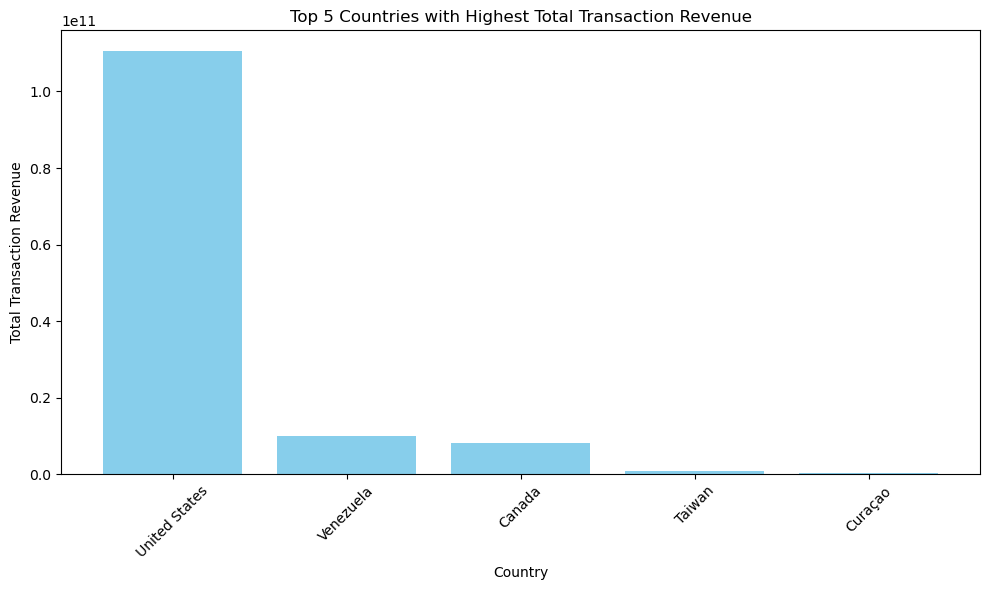

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'data' is the DataFrame with your provided data

# Remove rows where totalTransactionRevenue is NaN
data_cleaned = data.dropna(subset=['totalTransactionRevenue'])

# Group by country and calculate the total transaction revenue for each country
revenue_by_country = data_cleaned.groupby('country')['totalTransactionRevenue'].sum().reset_index()

# Get the top 5 countries with the highest total transaction revenue
top_5_countries = revenue_by_country.nlargest(5, 'totalTransactionRevenue')

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(top_5_countries['country'], top_5_countries['totalTransactionRevenue'], color='skyblue')
plt.xlabel('Country')
plt.ylabel('Total Transaction Revenue')
plt.title('Top 5 Countries with Highest Total Transaction Revenue')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

#### Analysis for Case 3

The result prompted by ChatGPT is perfectly match with what I want, the code grouping the country and sum the totalTransactionRevenue, filtered it to top 5 countries with highest revenue.

For the improvement, I will reuse the function of reformat revenue number and add data label on bar chart

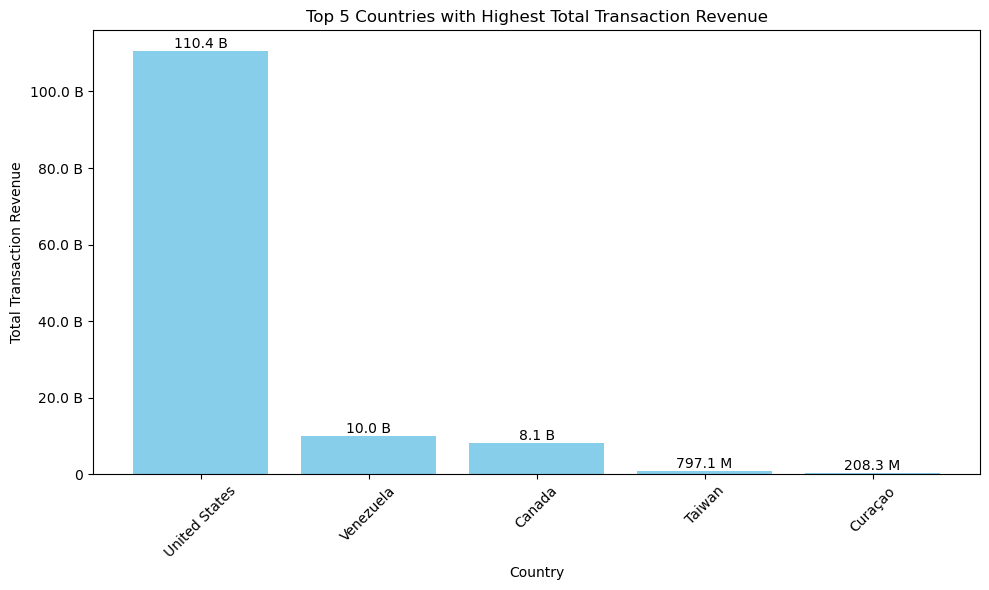

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'data' is the DataFrame with your provided data

# Remove rows where totalTransactionRevenue is NaN
data_cleaned = data.dropna(subset=['totalTransactionRevenue'])

# Group by country and calculate the total transaction revenue for each country
revenue_by_country = data_cleaned.groupby('country')['totalTransactionRevenue'].sum().reset_index()

# Get the top 5 countries with the highest total transaction revenue
top_5_countries = revenue_by_country.nlargest(5, 'totalTransactionRevenue')

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(top_5_countries['country'], top_5_countries['totalTransactionRevenue'], color='skyblue')
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_y_ticks))
add_formatted_labels(top_5_countries)
plt.xlabel('Country')
plt.ylabel('Total Transaction Revenue')
plt.title('Top 5 Countries with Highest Total Transaction Revenue')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()